<a href="https://colab.research.google.com/github/kihyuk-1/2-1-class/blob/main/inclass/07w_B_wed_0416_easy_ch_7_missingvalue_outler_upynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원  07 데이터 정제

In [9]:
!pip install numpy
!pip install pandas

In [13]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'sex': ['M', 'F', np.nan, 'M', 'F'],
    'score': [5, 4, 3, 5, None]
})


In [14]:
df['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,6.0
4,NaN


In [15]:
pd.isnull(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [16]:
pd.isna(df).sum()

,0
sex,1
score,1


In [17]:
pd.isna(df).sum(axis=0)

,0
sex,1
score,1


In [18]:
pd.isna(df).sum(axis=1)

,0
0,0
1,0
2,1
3,0
4,1


In [19]:
pd.isna(df).sum(axis='columns')

,0
0,0
1,0
2,1
3,0
4,1


In [20]:
s = pd.Series([True , False , True])
s

,0
0,True
1,False
2,True


In [21]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [23]:
df.isnull().any()

,0
sex,True
score,True


In [24]:
df.isna().any()

,0
sex,True
score,True


In [25]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [26]:
df.notnull().any()

,0
sex,True
score,True


In [27]:
df.notnull().all()

,0
sex,False
score,False


In [28]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [30]:
df.notna().any()

,0
sex,True
score,True


In [31]:
df.notna().all()

,0
sex,False
score,False


In [32]:
df.isna().any(axis=1)

,0
0,False
1,False
2,True
3,False
4,True


In [33]:
df.isna().any(axis=0)

,0
sex,True
score,True


In [34]:
df.notna().any(axis=1)

,0
0,True
1,True
2,True
3,True
4,True


In [35]:
~df.notna().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False


In [36]:
# 적어도 하나 이상 NaN인 행을 추출 , 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [37]:
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,5.0


# 결측값 시각화

In [39]:
!pip install seaborn

<Axes: >

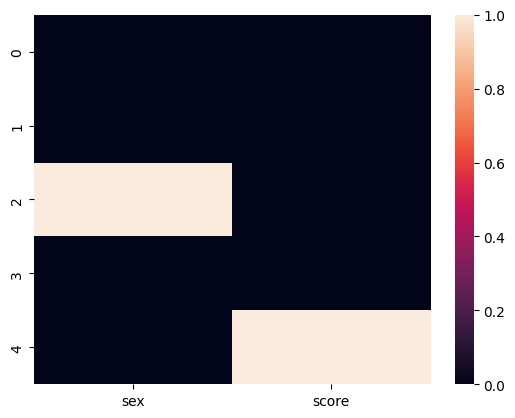

In [41]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: >

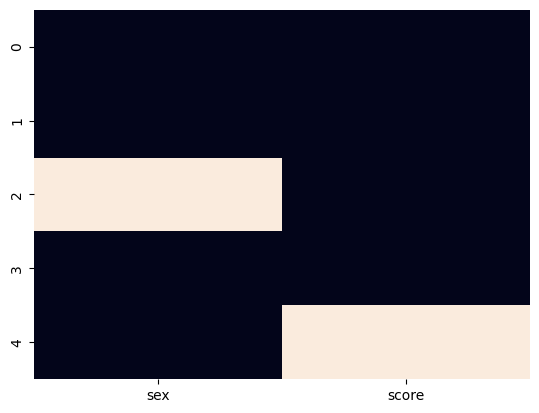

In [42]:
sns.heatmap(df.isnull() , cbar=False)

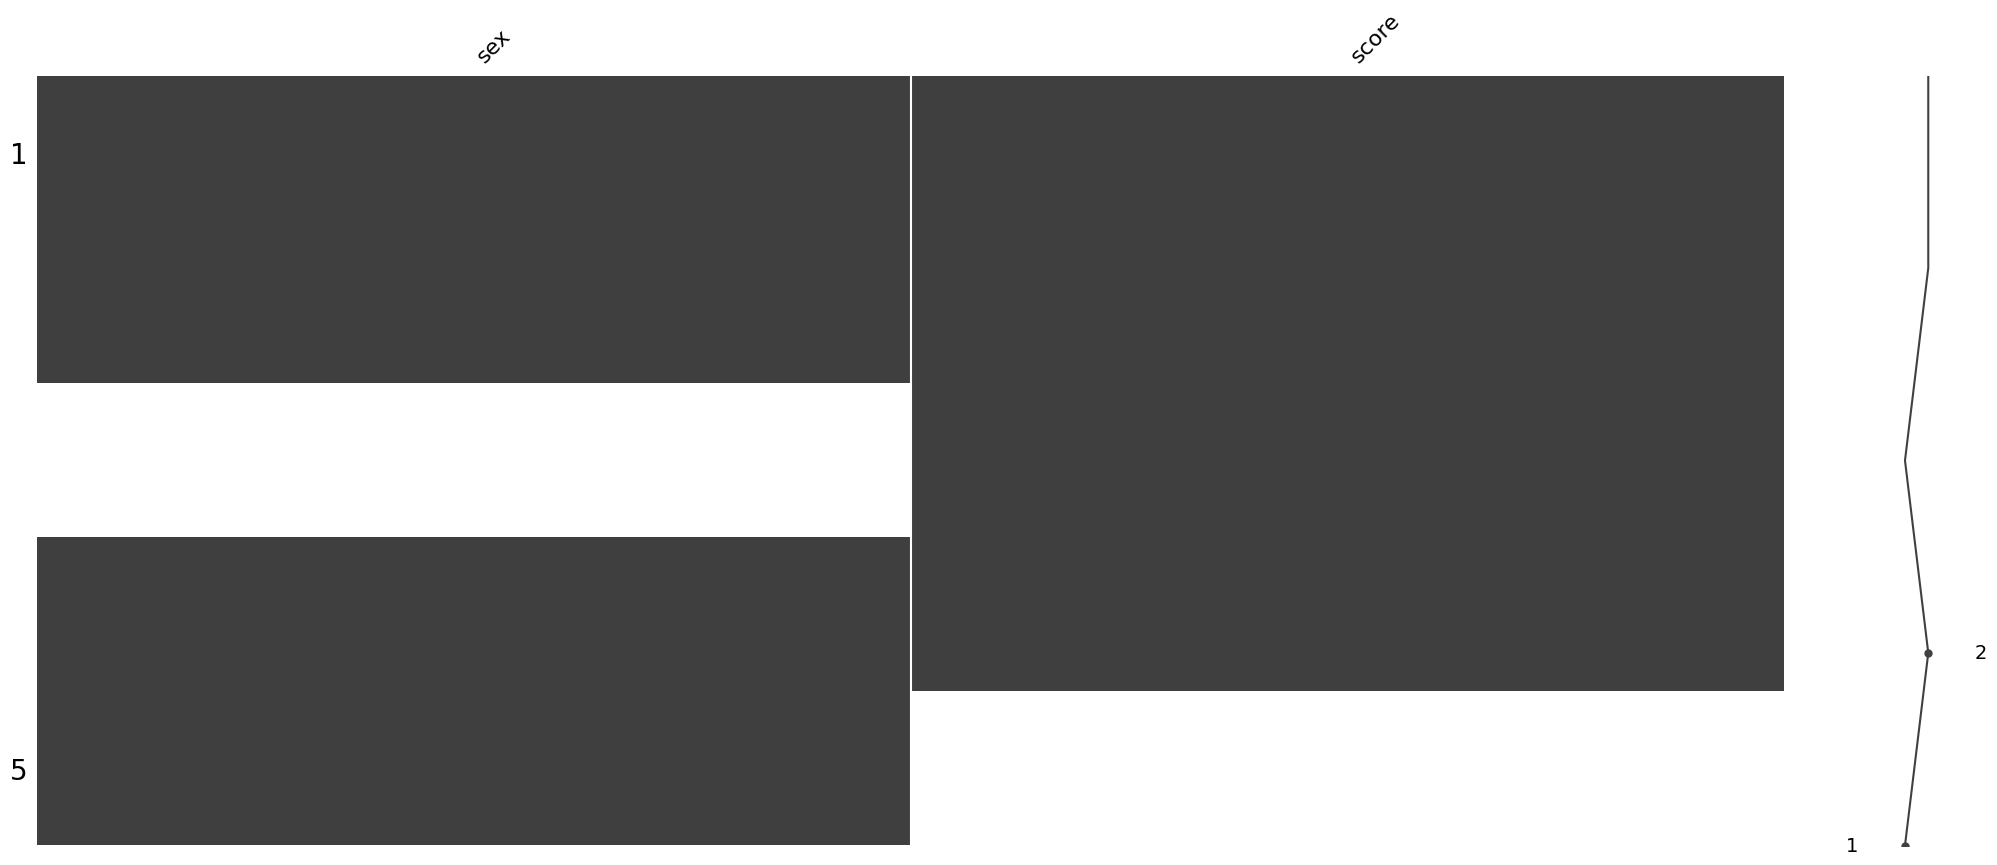

In [43]:
import missingno as msno
msno.matrix(df);

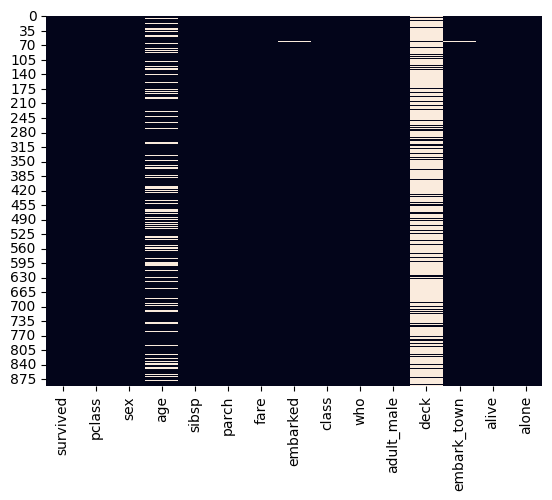

In [46]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf.isnull() , cbar=False );

In [47]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


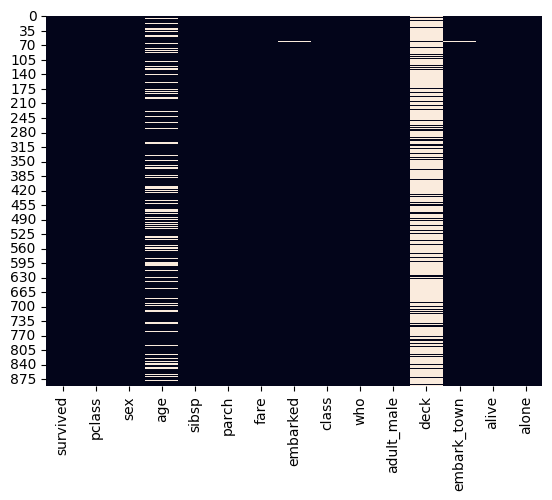

In [49]:
sns.heatmap(tdf.isnull() , cbar=False);

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
    - 행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
    - 그 점을 다음 행과 연결한 선

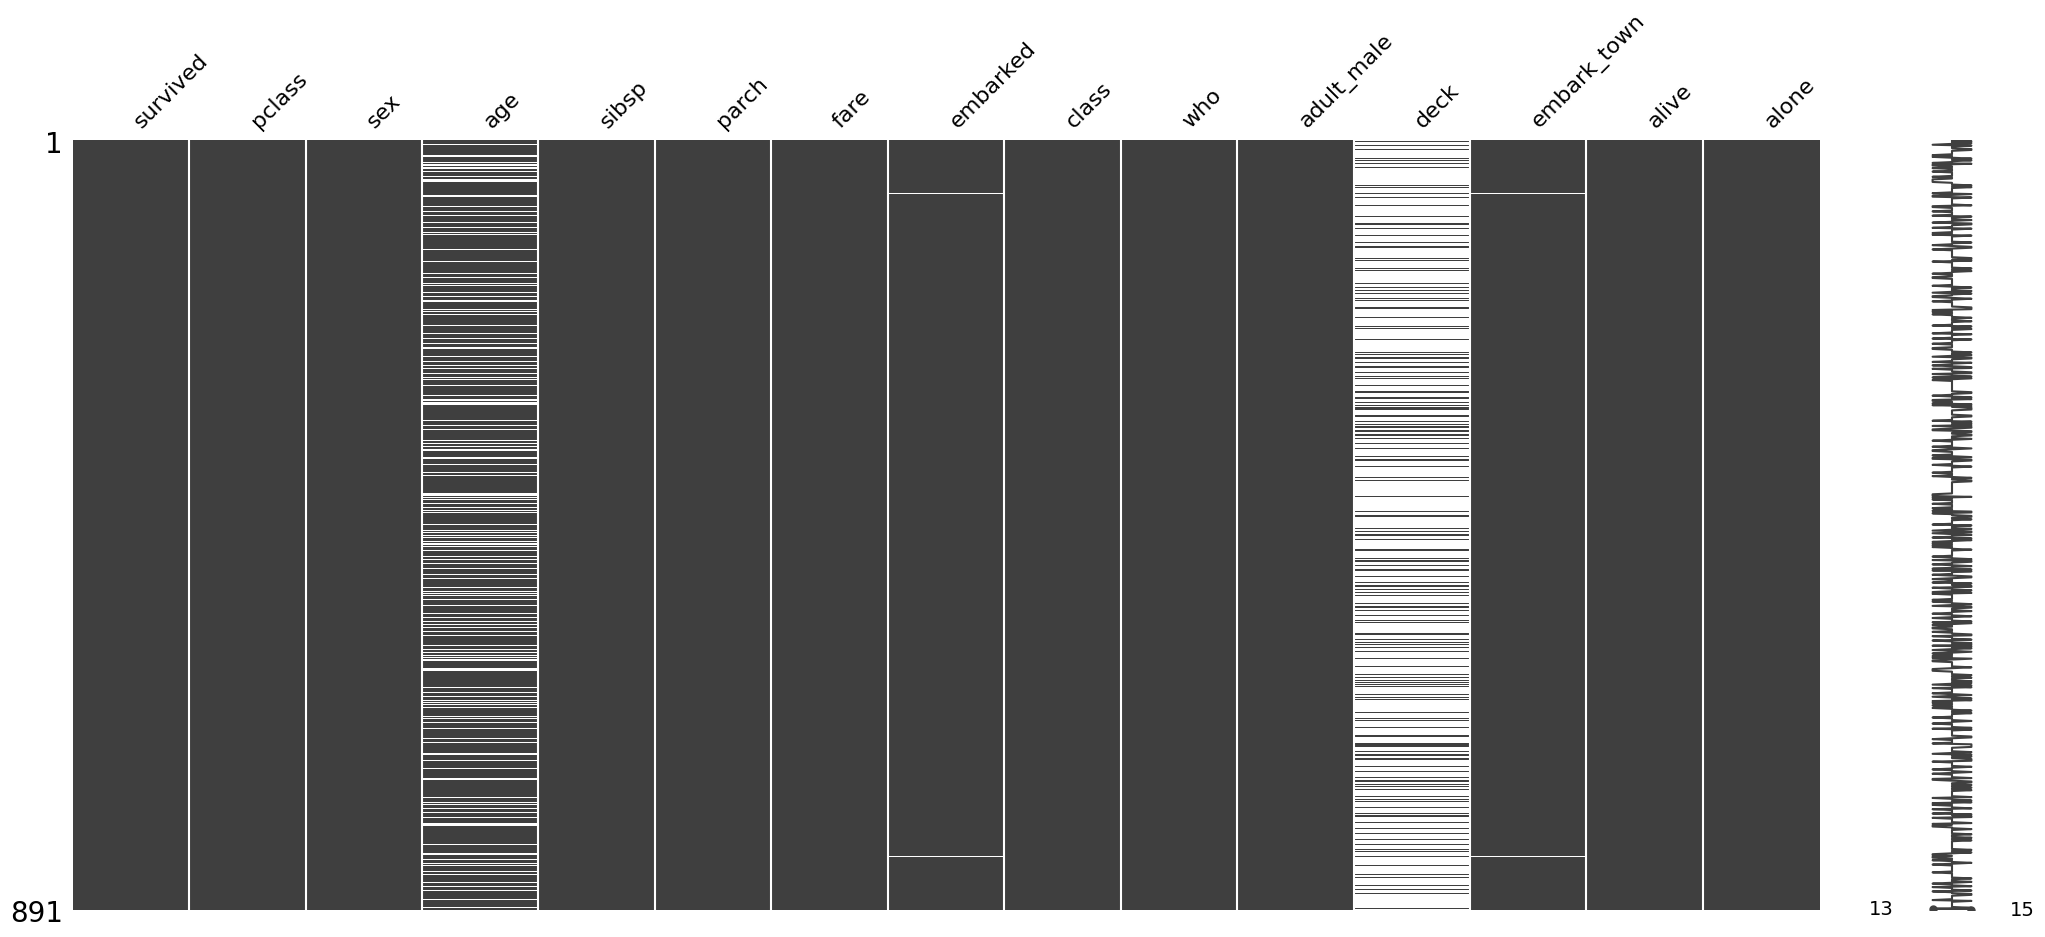

In [50]:
msno.matrix(tdf);

In [51]:
# 열 embarked가 NaN인 행 추출
tdf[tdf.embarked.isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [53]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
603,0,3,male,44.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
330,1,3,female,NaN,2,0,23.2500,Q,Third,woman,False,NaN,Queenstown,yes,False
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
162,0,3,male,26.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
313,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
814,0,3,male,30.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
370,1,1,male,25.0,1,0,55.4417,C,First,man,True,E,Cherbourg,yes,False
147,0,3,female,9.0,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
326,0,3,male,61.0,0,0,6.2375,S,Third,man,True,NaN,Southampton,no,True


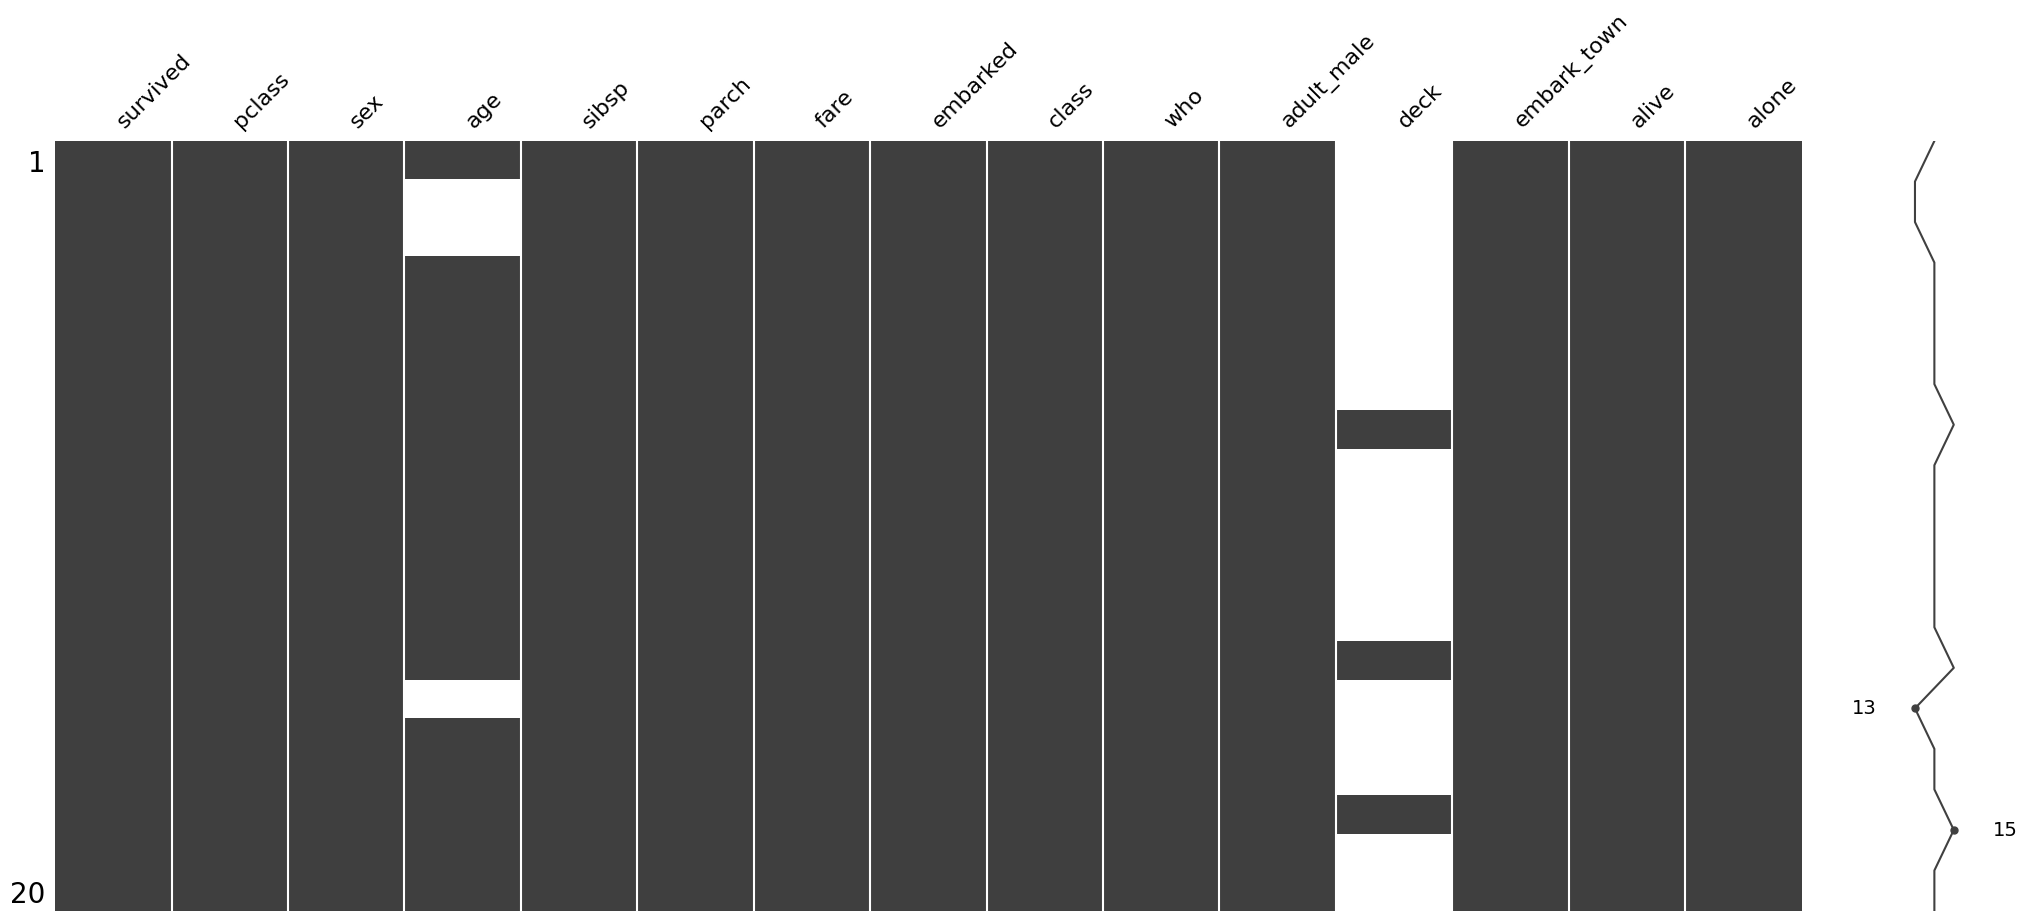

In [54]:
msno.matrix(tdf2);

In [55]:
# 열 embarked가 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [59]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [60]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
